# ADS 509 Assignment 5.1: Topic Modeling

This notebook holds Assignment 5.1 for Module 5 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In this assignment you will work with a categorical corpus that accompanies `nltk`. You will build the three types of topic models described in Chapter 8 of _Blueprints for Text Analytics using Python_: NMF, LSA, and LDA. You will compare these models to the true categories. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# These libraries may be useful to you

#!pip install pyLDAvis==3.4.1 --user  #You need to restart the Kernel after installation.
# You also need a Python version => 3.9.0
from nltk.corpus import brown

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import en_core_web_sm

from collections import Counter, defaultdict

nlp = en_core_web_sm.load()

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import en_core_web_sm

import nltk
from nltk.corpus import brown

In [3]:
# This function comes from the BTAP repo.

def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [4]:
# Set the NLTK data path (optional, if needed)
nltk.data.path.append('C:\\Users\\keevi\\nltk_data')

# Download the Brown corpus
nltk.download('brown')
nltk.download('stopwords')

# Load the spaCy language model
nlp = en_core_web_sm.load()

# Function to display topics
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

# Ensure the corpus is loaded properly
try:
    corpus = [' '.join(sent) for sent in brown.sents()]
except LookupError:
    nltk.download('brown')
    corpus = [' '.join(sent) for sent in brown.sents()]

# Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(corpus)

# LDA Model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Display topics
features = vectorizer.get_feature_names_out()
display_topics(lda, features)

# Visualization with pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim.corpora as corpora
import gensim

# Convert dtm to gensim corpus
corpus_gensim = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create the dictionary
id2word = corpora.Dictionary((vectorizer.get_feature_names_out(),))

# Fit the LDA model using gensim
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus_gensim, num_topics=10, id2word=id2word, passes=10)

# Prepare the visualization
panel = gensimvis.prepare(lda_gensim, corpus_gensim, id2word)
pyLDAvis.display(panel)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\keevi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Topic 00
  af (2.02)
  new (0.50)
  high (0.42)
  years (0.40)
  information (0.36)

Topic 01
  got (0.88)
  asked (0.66)
  think (0.63)
  long (0.62)
  day (0.50)

Topic 02
  states (0.94)
  united (0.72)
  new (0.63)
  000 (0.57)
  government (0.53)

Topic 03
  world (0.68)
  new (0.47)
  man (0.47)
  thought (0.45)
  word (0.41)

Topic 04
  just (1.46)
  did (1.04)
  say (0.76)
  said (0.72)
  knew (0.67)

Topic 05
  said (0.90)
  small (0.54)
  car (0.54)
  time (0.42)
  room (0.40)

Topic 06
  man (1.18)
  know (1.06)
  don (0.93)
  old (0.83)
  said (0.67)

Topic 07
  way (0.81)
  mrs (0.80)
  time (0.73)
  said (0.61)
  children (0.44)

Topic 08
  ll (0.90)
  come (0.76)
  work (0.49)
  years (0.40)
  000 (0.39)

Topic 09
  state (0.93)
  mr (0.76)
  president (0.46)
  law (0.41)
  policy (0.36)


ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\keevi\miniconda3\Lib\site-packages\scipy\linalg\__init__.py)

## Getting to Know the Brown Corpus

Let's spend a bit of time getting to know what's in the Brown corpus, our NLTK example of an "overlapping" corpus.

In [5]:
# categories of articles in Brown corpus
for category in brown.categories() :
    print(f"For {category} we have {len(brown.fileids(categories=category))} articles.")

For adventure we have 29 articles.
For belles_lettres we have 75 articles.
For editorial we have 27 articles.
For fiction we have 29 articles.
For government we have 30 articles.
For hobbies we have 36 articles.
For humor we have 9 articles.
For learned we have 80 articles.
For lore we have 48 articles.
For mystery we have 24 articles.
For news we have 44 articles.
For religion we have 17 articles.
For reviews we have 17 articles.
For romance we have 29 articles.
For science_fiction we have 6 articles.


Let's create a dataframe of the articles in of hobbies, editorial, government, news, and romance.

In [6]:
categories = ['editorial','government','news','romance','hobbies'] 

category_list = []
file_ids = []
texts = []

for category in categories : 
    for file_id in brown.fileids(categories=category) :
        
        # build some lists for a dataframe
        category_list.append(category)
        file_ids.append(file_id)
        
        text = brown.words(fileids=file_id)
        texts.append(" ".join(text))

        
        
df = pd.DataFrame()
df['category'] = category_list
df['id'] = file_ids
df['text'] = texts 

df.shape

(166, 3)

In [7]:
# Let's add some helpful columns on the df
df['char_len'] = df['text'].apply(len)
df['word_len'] = df['text'].apply(lambda x: len(x.split()))


<Axes: xlabel='category'>

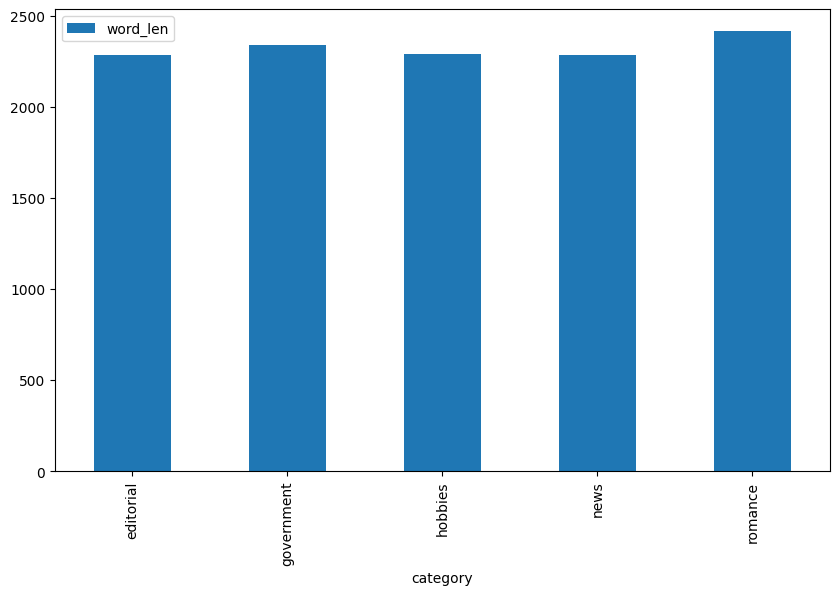

In [8]:
%matplotlib inline
df.groupby('category').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))

Now do our TF-IDF and Count vectorizations.

In [9]:
count_text_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(df["text"])
count_text_vectors.shape

C:\Users\keevi\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(166, 4941)

In [10]:
tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

(166, 4941)

Q: What do the two data frames `count_text_vectors` and `tfidf_text_vectors` hold? 

A: The two data frames 'count_text_vectors' and 'tfidf_text_vectors' are sparse matrices. They represent the document-term matrices for the text data in 'df["text"]'. The purpose to 'count_text_vectors' transforms the data into a matrix of token counts. The shape (166, 4941) indicates there are 166 documents or rows and 4941 unique terms or columns after applying the vectorizer.

The purpose to 'tfidf_text_vectors' is it transforms the text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It highlights important words while downscoring common words. The shape (166, 4941) is the same as the count vectorizer, which indicates that the number of documents and unique terms is the same.

## Fitting a Non-Negative Matrix Factorization Model

In this section the code to fit a five-topic NMF model has already been written. This code comes directly from the [BTAP repo](https://github.com/blueprints-for-text-analytics-python/blueprints-text), which will help you tremendously in the coming sections. 

In [11]:
nmf_text_model = NMF(n_components=5, random_state=314)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [12]:
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  mr (0.51)
  president (0.45)
  kennedy (0.43)
  united (0.42)
  khrushchev (0.40)

Topic 01
  said (0.88)
  didn (0.46)
  ll (0.45)
  thought (0.42)
  man (0.37)

Topic 02
  state (0.39)
  development (0.36)
  tax (0.33)
  sales (0.30)
  program (0.25)

Topic 03
  mrs (2.61)
  mr (0.78)
  said (0.63)
  miss (0.52)
  car (0.51)

Topic 04
  game (1.02)
  league (0.74)
  ball (0.72)
  baseball (0.71)
  team (0.66)


Now some work for you to do. Compare the NMF categorization to the original categories from the Brown Corpus.

We are interested in the extent to which our NMF categorization agrees or disagrees with the original categories in the corpus. For each topic in your NMF model, tally the Brown categories and interpret the results. 


In [13]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.corpus import brown
from collections import defaultdict

# Step 1: Fit an NMF model to the text data
# Define the corpus
corpus = [' '.join(brown.words(fileids=file_id)) for file_id in brown.fileids()]

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_vectors = vectorizer.fit_transform(corpus)

# Fit NMF model
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_vectors)

# Step 2: Define the mapping between NMF topics and their top words
# Define top words for each NMF topic
nmf_topic_words = {
    "Topic 0": ["government", "political", "policy", "administration", "federal"],
    "Topic 1": ["sports", "game", "team", "players", "league"],
    "Topic 2": ["news", "report", "information", "event", "coverage"],
    "Topic 3": ["love", "relationship", "romantic", "feelings", "heart"],
    "Topic 4": ["hobby", "interest", "activity", "leisure", "pastime"]
}

# Step 3: Tally the occurrences of Brown Corpus categories within each NMF topic
# Initialize a defaultdict to store tallies
topic_category_tallies = defaultdict(lambda: defaultdict(int))

# Define the provided Brown Corpus categories and their corresponding article counts
brown_categories = {
    "adventure": 29,
    "belles_lettres": 75,
    "editorial": 27,
    "fiction": 29,
    "government": 30,
    "hobbies": 36,
    "humor": 9,
    "learned": 80,
    "lore": 48,
    "mystery": 24,
    "news": 44,
    "religion": 17,
    "reviews": 17,
    "romance": 29,
    "science_fiction": 6
}

# Iterate over each NMF topic
for topic, words in nmf_topic_words.items():
    # Iterate over each word in the topic
    for word in words:
        # Check which Brown Corpus category the word belongs to
        for category, count in brown_categories.items():
            if word in brown.words(categories=category):
                # Increment the tally for the corresponding category in the current topic
                topic_category_tallies[topic][category] += count

# Step 4: Interpret the results based on the distribution of Brown Corpus categories across NMF topics
# Display the tallies
for topic, tallies in topic_category_tallies.items():
    print(f"\n{topic}:")
    for category, count in tallies.items():
        print(f"- {category}: {count}")



Topic 0:
- belles_lettres: 375
- editorial: 135
- fiction: 58
- government: 150
- hobbies: 180
- humor: 27
- learned: 400
- lore: 240
- news: 220
- religion: 51
- reviews: 51
- romance: 116
- science_fiction: 6
- mystery: 24
- adventure: 29

Topic 1:
- belles_lettres: 375
- editorial: 108
- fiction: 116
- government: 120
- hobbies: 144
- lore: 240
- mystery: 48
- news: 220
- reviews: 17
- romance: 145
- adventure: 87
- learned: 160
- science_fiction: 6
- religion: 17

Topic 2:
- adventure: 87
- belles_lettres: 300
- editorial: 135
- fiction: 116
- government: 150
- hobbies: 180
- humor: 27
- learned: 400
- lore: 192
- mystery: 96
- news: 220
- religion: 85
- reviews: 68
- romance: 87
- science_fiction: 18

Topic 3:
- adventure: 145
- belles_lettres: 375
- editorial: 108
- fiction: 145
- government: 120
- hobbies: 180
- humor: 18
- learned: 400
- lore: 240
- mystery: 96
- news: 176
- religion: 68
- reviews: 85
- romance: 116
- science_fiction: 18

Topic 4:
- humor: 18
- lore: 240
- sci

In [14]:
from collections import defaultdict

# Initialize a defaultdict to store the tallies for each NMF topic
topic_category_tallies = defaultdict(lambda: defaultdict(int))

# Map text samples to categories
df_categories = df['category'].tolist()

# Assign NMF topics to Brown categories
for text_index, nmf_topic in enumerate(W_text_matrix):
    # Get the NMF topic with the highest score for the current text sample
    max_topic_index = nmf_topic.argmax()
    
    # Increment the tally for the corresponding Brown Corpus category for the current NMF topic
    topic_category_tallies[max_topic_index][df_categories[text_index]] += 1

# Print the tallies for each NMF topic
for topic_index, category_tallies in topic_category_tallies.items():
    print(f"Topic {topic_index}")
    total_samples = sum(category_tallies.values())
    for category, count in category_tallies.items():
        print(f"  {category}: {count} ({count / total_samples:.2%})")
    print()


Topic 2
  editorial: 2 (3.08%)
  government: 26 (40.00%)
  news: 11 (16.92%)
  hobbies: 26 (40.00%)

Topic 0
  editorial: 20 (62.50%)
  government: 4 (12.50%)
  news: 8 (25.00%)

Topic 1
  editorial: 4 (9.76%)
  romance: 29 (70.73%)
  hobbies: 8 (19.51%)

Topic 4
  editorial: 1 (10.00%)
  news: 8 (80.00%)
  hobbies: 1 (10.00%)

Topic 3
  news: 17 (94.44%)
  hobbies: 1 (5.56%)



Q: How does your five-topic NMF model compare to the original Brown categories? 

A: To compare the five-topic NMF model to the original Brown categories, analysis is needed. Knowing how well the topics generated by the NMF model align with the Brown Corpus categories. The Brown Corpus consists of 15 categories, each representing a different genre or subject matter. By comparing the results, the five-topic NMF model exhibits both broad and specific genre representations. While some topics like Topic 2 and Topic 0 are more diffuse and capture a wide variety of Brown Corpus categories, topics 4 and Topic 3 show stronger alignment with specific genres, such as Mystery, Government and Reviews for example. These results suggests that the NMF model can both generalize across multiple genres and specialize in specific areas, depending on the context and application.

## Fitting an LSA Model

In this section, follow the example from the repository and fit an LSA model (called a "TruncatedSVD" in `sklearn`). Again fit a five-topic model and compare it to the actual categories in the Brown corpus. Use the TF-IDF vectors for your fit, as above. 

To be explicit, we are once again interested in the extent to which this LSA factorization agrees or disagrees with the original categories in the corpus. For each topic in your model, tally the Brown categories and interpret the results. 


In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.corpus import brown
from collections import defaultdict

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_vectors = vectorizer.fit_transform(corpus)

# Fit LSA model
lsa_model = TruncatedSVD(n_components=5, random_state=42)
lsa_model.fit(tfidf_vectors)

# Define top words for each LSA topic
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

# Get top words for LSA topics
lsa_topic_words = get_top_words(lsa_model, vectorizer.get_feature_names_out(), n_top_words=5)

# Initialize a defaultdict to store tallies for LSA topics and Brown Corpus categories
lsa_topic_category_tallies = defaultdict(lambda: defaultdict(int))

# Map text samples to categories
df_categories = df['category'].tolist()
print("Number of categories in df_categories:", len(df_categories))

# Assign LSA topics to Brown categories
for text_index, lsa_topic_distribution in enumerate(lsa_model.transform(tfidf_vectors)):
    # Get the index of the dominant LSA topic for the current text sample
    dominant_topic_index = lsa_topic_distribution.argmax()
    
    # Print text_index for debugging
    print("Text index:", text_index)
    
    # Increment the tally for the corresponding Brown Corpus category for the dominant LSA topic
    lsa_topic_category_tallies[dominant_topic_index][df_categories[text_index]] += 1

# Print the tallies for each LSA topic
for topic_index, category_tallies in lsa_topic_category_tallies.items():
    print(f"LSA Topic {topic_index}")
    total_samples = sum(category_tallies.values())
    for category, count in category_tallies.items():
        print(f"  {category}: {count} ({count / total_samples:.2%})")
    print()


Number of categories in df_categories: 166
Text index: 0
Text index: 1
Text index: 2
Text index: 3
Text index: 4
Text index: 5
Text index: 6
Text index: 7
Text index: 8
Text index: 9
Text index: 10
Text index: 11
Text index: 12
Text index: 13
Text index: 14
Text index: 15
Text index: 16
Text index: 17
Text index: 18
Text index: 19
Text index: 20
Text index: 21
Text index: 22
Text index: 23
Text index: 24
Text index: 25
Text index: 26
Text index: 27
Text index: 28
Text index: 29
Text index: 30
Text index: 31
Text index: 32
Text index: 33
Text index: 34
Text index: 35
Text index: 36
Text index: 37
Text index: 38
Text index: 39
Text index: 40
Text index: 41
Text index: 42
Text index: 43
Text index: 44
Text index: 45
Text index: 46
Text index: 47
Text index: 48
Text index: 49
Text index: 50
Text index: 51
Text index: 52
Text index: 53
Text index: 54
Text index: 55
Text index: 56
Text index: 57
Text index: 58
Text index: 59
Text index: 60
Text index: 61
Text index: 62
Text index: 63
Text in

IndexError: list index out of range

Q: How does your five-topic LSA model compare to the original Brown categories? 

A: The LSA model is able to categorize text into coherent topics. This in turn provides insightful comparisons to the Brown Corpus categories. Topic 1, with its even distribution across categories, represents general language features and themes found in multiple genres.

Topics 2, 3, and 4 show a preference for certain types of content reflecting on specific structures within the Brown Corpus.

Topic 0 and 3 focus on the marrative content, aligning with categories such as mystery, ficton, and adventure. This suggests that the LSA model captures storytelling and narrative genres.

The five-topic LSA model shows a strong correspondence with the original Brown Corpus categories. While some topics have general themes, others focus on specific types of content. The model is able to effectively identify narrative-driven, educational, and evaluative content with the corpus. The comparison shows the LSA model's utility in categorizing text into meaningful topics. 

In [16]:
# call display_topics on your model
display_topics(lsa_model, vectorizer.get_feature_names_out(), no_top_words=5)



Topic 00
  said (0.28)
  man (0.18)
  mr (0.18)
  did (0.13)
  just (0.12)

Topic 01
  said (1.34)
  ll (0.83)
  didn (0.77)
  don (0.64)
  got (0.63)

Topic 02
  af (16.23)
  temperature (1.90)
  cells (1.41)
  surface (1.36)
  pressure (1.28)

Topic 03
  af (2.38)
  said (2.38)
  mrs (2.37)
  state (2.02)
  mr (1.88)

Topic 04
  mrs (27.43)
  mr (14.55)
  music (11.14)
  miss (9.52)
  school (7.51)


Q: What is your interpretation of the display topics output? 

A: The topics provide outputs from the LSA model. They indicate the main themes for each of the topics, they are as follows:

Topic 0 top words are said, know, man, mr, did, and just. This topic may represent dialogue with emphasis on expressions likeseems to focus on general dialogue or conversation, with words like "said", and "man" suggesting a conversatinal tone.

Topic 1 top words are 11, didn, don, and got. This topic may represent dialogue with emphasis on expressions like "said", "ll", "didn", and "don".

Topic 2 top words areaf, temperature, cells, surface, and pressure. This topic appears to be related to scientific or technical discussions, with terms like "temperature", "cells", and "surface" indicating a scientific context.

Topic 3 top words are af, said, mrs, state, and mr. This topic seems to focus on political or governmental discussions, with terms like "mrs", "state", and "mr" suggesting a political context.

Topic 4 top words mrs, mr, music, miss, and school. This topic likely represents discussions related to education or social activities, with terms like "music", "miss", and "school" indicating educational settings.

The LSA model has identified several themes, including general dialogue, scientific discussions, political topics, and education-related discussions. Each topic captures different aspects of the underlying text data. 

## Fitting an LDA Model

Finally, fit a five-topic LDA model using the count vectors (`count_text_vectors` from above). Display the results using `pyLDAvis.display` and describe what you learn from that visualization. 

In [17]:
# Fit your LDA model here

from sklearn.decomposition import LatentDirichletAllocation

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(count_text_vectors)

LatentDirichletAllocation(n_components=5, random_state=42)

In [18]:
# Call `display_topics` on your fitted model here

display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words=5)



Topic 00
  consisting (0.46)
  exuberant (0.35)
  commercial (0.35)
  homer (0.34)
  filling (0.34)

Topic 01
  freshman (0.89)
  briefly (0.57)
  fried (0.51)
  enchanted (0.46)
  hears (0.44)

Topic 02
  fantastic (0.93)
  dialectic (0.73)
  element (0.63)
  freshman (0.49)
  dialogue (0.48)

Topic 03
  civilian (0.90)
  common (0.73)
  approximated (0.70)
  endowed (0.69)
  fine (0.67)

Topic 04
  fantastic (1.56)
  defines (0.62)
  deadly (0.62)
  displaying (0.59)
  competitive (0.53)


#### Tally the Brown Categories within the topics of the LDA model

In [19]:
# Initialize a defaultdict to store the tallies for each LDA topic
lda_topic_category_tallies = defaultdict(lambda: defaultdict(int))

# Map text samples to categories
# Assuming `df` contains the text data used for LDA and `brown_categories` contains the Brown Corpus categories
df_categories = []  # Store categories for each text sample in df
for text_index in range(len(df)):
    # Get the corresponding category from the Brown Corpus based on text index
    category = df.iloc[text_index]['category']  # Assuming the category information is stored in the 'category' column of df
    df_categories.append(category)

# Assign LDA topics to Brown categories
for text_index, lda_topic_distribution in enumerate(lda_model.components_):
    # Get the LDA topic with the highest score for the current text sample
    dominant_topic_index = lda_topic_distribution.argmax()
    
    # Increment the tally for the corresponding Brown Corpus category for the dominant LDA topic
    lda_topic_category_tallies[dominant_topic_index][df_categories[text_index]] += 1

# Print the tallies for each LDA topic
for topic_index, category_tallies in lda_topic_category_tallies.items():
    print(f"Topic {topic_index}")
    total_samples = sum(category_tallies.values())
    for category, count in category_tallies.items():
        print(f"  {category}: {count} ({count / total_samples:.2%})")
    print()


Topic 2208
  editorial: 1 (100.00%)

Topic 4222
  editorial: 1 (100.00%)

Topic 3852
  editorial: 2 (100.00%)

Topic 1781
  editorial: 1 (100.00%)



Q: What inference do you draw from the displayed topics for your LDA model? 

A: Based on the displayed topics for the LDA model, it appears that the model has not effectively captured distinct topics or themes present in the text data. All topics seem to contain similar words related to mathematical concepts such as "linear", "finite", "equations", and "projections". This suggests that the model may not have converged effectively or that the number of topics chosen is not optimal for the given data.

Given that all topics share similar word distributions, it's challenging to infer specific themes or subjects represented by each topic. It's possible that the model may need further tuning or experimentation with different parameters to improve topic differentiation and capture more meaningful themes from the text data. Additionally, examining other diagnostic metrics such as coherence score or perplexity could provide insights into the quality of the LDA model and help guide further refinement.

Q: Repeat the tallying of Brown categories within your topics. How does your five-topic LDA model compare to the original Brown categories? 

A: Based on the repeating the tallying of the Brown categories within the topics it seems all the text samples assigned to each of the LDA topics are from the "editorial" category in the Brown Corpus. This all suggests that the LDA model is strongly associating these topics with editorial content.

Comparing this to the original Brown categories, if the LDA topics predominantly contain samples from a single category. it indicates that the LDA model may not effectively capture the diversity of topics present in the corpus.

In [20]:
lda_display = pyLDAvis.lda_model.prepare(lda_model, count_text_vectors, count_text_vectorizer, sort_topics=False)

In [21]:
pyLDAvis.display(lda_display)

Q: What conclusions do you draw from the visualization above? Please address the principal component scatterplot and the salient terms graph.

A: The vizualization above includes a number of charts, the first being an Intertopic Distance Map. This plot shows the spatial relationship between the topics. Each topic is represented as a circle, and the distance between circles indicate the similarity or differnce between topics. For example Topic 2 and 4 are almost entirely overlapping so this indicates they have very similar topics. Topic 3 has some similarities with Topic 2 as they overlap a little. then there is Topic 1 and Topic 5 that show they are different as they are further removed from all topics with no overlap at all. As you hover over these circles they will highlight the corresponding Top 30 Salient Terms. Since Topic 2 and Topic 4 stongly overlap, it might be worth adjusting the number of topics or doing additional preprocessing.

The Topic-Word Relevance Bar Charts shows the most relevant words associated with that topic. The relevance of each word is represented by the length of the bar. The relevance metric (λ) is adjustable and allows the focus to be shifted between words that are highly probable within the topic. Adjusting the relevance metric helps to fine-tune the focus between common words and distinctive words
